# Assignment #2
## Pandas and Visualization

### Getting Data
Select a dataset from [Toronto Open Data](https://open.toronto.ca/catalogue/) or another data portal of your choice, and download it. Some suggested datasets are linked below and additionally available for download in [the course repo /data folder](https://github.com/amfz/dsi-python-workshop/tree/main/data). A good dataset for this exercise will have a mix of data types.

Some sugested datasets:
* [TTC bus delays](https://open.toronto.ca/dataset/ttc-bus-delay-data/): Fewer columns, not well documented, some NaNs. Similar to data we've worked with in class. Recommend choosing a full year of data.
* [Apartment building evaluations](https://open.toronto.ca/dataset/apartment-building-evaluation/): Lots of columns, well-documented, some NaNs.
* [Daily shelter overnight service occupancy and capcity](https://open.toronto.ca/dataset/daily-shelter-overnight-service-occupancy-capacity/): The largest of the datasets suggested. Lots of columns, well-documented, more NaNs.


### Metadata Review
1. What organization publishes this dataset?
2. How frequently is the dataset updated?
3. What metadata is available (e.g., column names, data types, descriptions)?
4. Is there documentation about who or what produces the data? About who collects it? Through what processes?
5. Is there documentation about limitations of the data, such as possible sources of error or omission?
6. Are there any restrictions concerning data access or use? (e.g.,registraton required or non-commercial use only)

### Answer

Toronto Transit Commission (TTC) is the organization that publishes the dataset on TTC bus delays.

The dataset is updated on a monthly basis, with each month's data typically becoming available within the first week of the following month.

Metadata available includes:
- **Date**: The date of the incident (Data Type: Date).
- **Route**: The bus route number (Data Type: Integer).
- **Time**: The time when the delay was reported (Data Type: Time).
- **Day**: The day of the week (Data Type: String).
- **Location**: The location where the delay occurred (Data Type: String).
- **Incident**: The type of incident causing the delay (Data Type: String).
- **Min Delay**: The minimum delay in minutes (Data Type: Integer).
- **Min Gap**: The minimum gap to the next bus in minutes resulting from the delay (Data Type: Integer).
- **Direction**: The compass direction the bus was traveling (Data Type: String).
- **Vehicle**: The vehicle number (Data Type: Integer).

Documentation on the production and collection of the data is provided by the TTC, outlining that the data is generated by TTC's daily operational reports and collected through various reporting mechanisms within the TTC's operational structure.

There is documentation provided about the limitations of the data, which includes disclaimers about the accuracy and completeness of the data due to the dynamic nature of public transportation delays and the varying accuracy of reporting tools.

Regarding restrictions on data access or use, the dataset is publicly available under the City of Toronto's Open Data License, which allows for free use and distribution with attribution to the City of Toronto and in accordance with the terms of the license. No registration is required for access.

## Getting started
### 0. Importing libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


### 1. Load the data to a single DataFrame.


In [95]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('data/ttc-bus-delay-data-2023.csv')

# Display the DataFrame
df


,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...
50908,30-Nov-23,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,E,3581
50909,30-Nov-23,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,E,8390
50910,30-Nov-23,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,10,20,W,1652
50911,30-Nov-23,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,11,21,N,8192


### 2. Profile the DataFrame.
####   * What are the column names?


In [96]:
# Get the list of column names
df.columns.tolist()


['Date',
 'Route',
 'Time',
 'Day',
 'Location',
 'Incident',
 'Min Delay',
 'Min Gap',
 'Direction',
 'Vehicle']

####   * What are the dtypes when loaded? Do any not make sense?

In [97]:
# Check the data types of the DataFrame
df.dtypes


Date         object
Route        object
Time         object
Day          object
Location     object
Incident     object
Min Delay     int64
Min Gap       int64
Direction    object
Vehicle       int64
dtype: object

####   * How many NaNs are in each column?

In [98]:
# Check the number of NaN values in each column
df.isnull().sum()


Date            0
Route         528
Time            0
Day             0
Location        0
Incident        0
Min Delay       0
Min Gap         0
Direction    8775
Vehicle         0
dtype: int64

####   * What is the shape of the DataFrame?

In [99]:
# Get the shape of the DataFrame
df.shape  


(50913, 10)

### 3. Generate some summary statistics for the data.

#### * For numeric columns: What are the max, min, mean, and median?

In [100]:
df.describe()


,Min Delay,Min Gap,Vehicle
count,50913.000000,50913.000000,50913.000000
mean,20.465618,33.113036,5575.876220
std,51.284516,53.427256,3791.229311
min,0.000000,0.000000,0.000000
25%,9.000000,17.000000,3151.000000
50%,11.000000,21.000000,7920.000000
75%,20.000000,40.000000,8547.000000
max,998.000000,992.000000,91024.000000


####    * For text columns: What is the most common value? How many unique values are there?

In [101]:
# Find the most common value in a text column
most_common_value = df['Location'].value_counts().idxmax()


most_common_value


'KENNEDY STATION'

In [102]:
# Find the number of unique values in a text column
num_unique_values = df['Location'].nunique()
num_unique_values

11055

### 4. Rename one or more columns in the DataFrame.

In [103]:
# Rename columns 'Location' to 'Area' and 'Incident' to 'Event'
df = df.rename(columns={'Location': 'Area', 'Incident': 'Event'})  
df.head(5)


,Date,Route,Time,Day,Area,Event,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


### 5. Select a single column and find its unique values.

In [104]:
# Get unique values from the 'Area' column
unique_area = df['Area'].unique()
unique_area


array(['WOODBINE AND MORTIMER', 'WARDEN STATION', 'JANE STATION', ...,
       'AIRPORT RD AND 427 RAM', 'JANE AND MURRY ROSS',
       'WARDEN AND UPTOWN'], dtype=object)

### 6. Select a single text/categorical column and find the counts of its values.

In [105]:
# Count the occurrences of each event in the 'Event' column
event_counts = df['Event'].value_counts()

# Display the event counts
event_counts


Event
Mechanical                          17527
Operations - Operator               10039
Security                             4426
Collision - TTC                      3603
Diversion                            3423
General Delay                        2961
Emergency Services                   2733
Utilized Off Route                   2126
Cleaning - Unsanitary                1937
Investigation                        1152
Vision                                678
Road Blocked - NON-TTC Collision      235
Held By                                73
Name: count, dtype: int64

### 7. Convert the data type of at least one of the columns. If all columns are typed correctly, convert one to `str` and back.

In [106]:
# Check the data types of the DataFrame
df.dtypes


Date         object
Route        object
Time         object
Day          object
Area         object
Event        object
Min Delay     int64
Min Gap       int64
Direction    object
Vehicle       int64
dtype: object

In [107]:
# Change the datatype of the 'Area' column to string
df['Vehicle'] = df['Vehicle'].astype(str)
df.dtypes


Date         object
Route        object
Time         object
Day          object
Area         object
Event        object
Min Delay     int64
Min Gap       int64
Direction    object
Vehicle      object
dtype: object

In [108]:
# Convert Vehicle column from object to int64
df['Vehicle'] = df['Vehicle'].astype('int64')  
df.dtypes

Date         object
Route        object
Time         object
Day          object
Area         object
Event        object
Min Delay     int64
Min Gap       int64
Direction    object
Vehicle       int64
dtype: object

### 8. Write the DataFrame to a different file format than the original.

In [109]:
# Create a copy of the dataframe
df_copy = df.copy()

# Save the copy as an Excel file
df_copy.to_excel('data/ttc-bus-delay-data-2023.xlsx')


In [110]:
# Create a new copy to used for manipulation
df_proc_csv = df.copy()

# Save the copy as a CSV file
df_proc_csv.to_csv('data/ttc-bus-delay-data-2023-proc.csv')

### More data wrangling, filtering
#### 1. Create a column derived from an existing one. Some possibilities:


In [111]:
df_proc_csv['Vehicle'].unique()

array([8772, 8407, 1051, ...,  785, 7293, 7224], dtype=int64)

In [112]:
# Insert the "Month" column in the 3rd position with default value (e.g., January)
df_proc_csv.insert(1, "Month", "January")

# Insert the "Year" column in the 4th position with default value (e.g., 2022)
df_proc_csv.insert(2, "Year", 2022)

In [113]:
df_proc_csv.head(5)

,Date,Month,Year,Route,Time,Day,Area,Event,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,January,2022,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,January,2022,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,January,2022,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,January,2022,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,January,2022,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


In [114]:
# Rename the "Date" column to "DD"
df_proc_csv = df_proc_csv.rename(columns={'Date': 'DD'})

# Rename the "Month" column to "MM"
df_proc_csv = df_proc_csv.rename(columns={'Month': 'MM'})

# Rename the "Year" column to "YY"
df_proc_csv = df_proc_csv.rename(columns={'Year': 'YY'})

df_proc_csv.head(5)


,DD,MM,YY,Route,Time,Day,Area,Event,Min Delay,Min Gap,Direction,Vehicle
0,1-Jan-23,January,2022,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1-Jan-23,January,2022,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1-Jan-23,January,2022,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1-Jan-23,January,2022,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1-Jan-23,January,2022,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559


####    * Extract a date or time part (e.g. hour, month, day of week)

In [115]:
# Split the "DD" column into day, month, and year
df_proc_csv[['DD', 'MM', 'YY']] = df_proc_csv['DD'].str.split('-', expand=True)

# Display the updated DataFrame
df_proc_csv


,DD,MM,YY,Route,Time,Day,Area,Event,Min Delay,Min Gap,Direction,Vehicle
0,1,Jan,23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,1,Jan,23,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,1,Jan,23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,1,Jan,23,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,1,Jan,23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,10,20,E,3581
50909,30,Nov,23,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,24,48,E,8390
50910,30,Nov,23,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,10,20,W,1652
50911,30,Nov,23,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,11,21,N,8192


####    * Bin a continuous variable

In [116]:
df_proc_csv.insert(8, "Event Code", "1")  # Insert a new column "Event Code" at index 8 with default value "1"

df_proc_csv

,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Direction,Vehicle
0,1,Jan,23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,1,81,111,NaN,8772
1,1,Jan,23,69,02:34,Sunday,WARDEN STATION,Security,1,22,44,S,8407
2,1,Jan,23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,1,30,60,N,1051
3,1,Jan,23,900,03:14,Sunday,KIPLING STATION,Security,1,17,17,NaN,3334
4,1,Jan,23,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,1,10,20,E,3581
50909,30,Nov,23,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,1,24,48,E,8390
50910,30,Nov,23,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,1,10,20,W,1652
50911,30,Nov,23,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,1,11,21,N,8192


In [117]:
# Add a new column 'Event Code' and assign unique numerical codes to each event
df_proc_csv['Event Code'] = df_proc_csv['Event'].factorize()[0] + 1

df_proc_csv

,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Direction,Vehicle
0,1,Jan,23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,1,81,111,NaN,8772
1,1,Jan,23,69,02:34,Sunday,WARDEN STATION,Security,2,22,44,S,8407
2,1,Jan,23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,3,30,60,N,1051
3,1,Jan,23,900,03:14,Sunday,KIPLING STATION,Security,2,17,17,NaN,3334
4,1,Jan,23,85,03:43,Sunday,MEADOWALE LOOP,Security,2,1,1,NaN,1559
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,6,10,20,E,3581
50909,30,Nov,23,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,6,24,48,E,8390
50910,30,Nov,23,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,3,10,20,W,1652
50911,30,Nov,23,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,7,11,21,N,8192


In [118]:
# Define the bin edges
bin_edges = [1, 4, 7, 10, 13]

# Define the bin labels
bin_labels = ['1-3', '4-6', '7-9', '10-13']

# Bin the "Event Code" column
df_proc_csv['Event Code Group'] = pd.cut(df_proc_csv['Event Code'], bins=bin_edges, labels=bin_labels, right=False)

# Display the updated DataFrame
df_proc_csv


,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Direction,Vehicle,Event Code Group
0,1,Jan,23,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,1,81,111,NaN,8772,1-3
1,1,Jan,23,69,02:34,Sunday,WARDEN STATION,Security,2,22,44,S,8407,1-3
2,1,Jan,23,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,3,30,60,N,1051,1-3
3,1,Jan,23,900,03:14,Sunday,KIPLING STATION,Security,2,17,17,NaN,3334,1-3
4,1,Jan,23,85,03:43,Sunday,MEADOWALE LOOP,Security,2,1,1,NaN,1559,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thursday,SHEPPARD-YONGE STATION,Mechanical,6,10,20,E,3581,4-6
50909,30,Nov,23,960,00:25,Thursday,STEELES AND GERRY FITZ,Mechanical,6,24,48,E,8390,4-6
50910,30,Nov,23,116,00:44,Thursday,KENNEDY STATION,Cleaning - Unsanitary,3,10,20,W,1652,1-3
50911,30,Nov,23,7,00:48,Thursday,FISHERVILLE AND BATHUR,Operations - Operator,7,11,21,N,8192,7-9


#### * Replace text in a column (e.g. replacing occurrences of "Street" with "St.")

In [119]:
# Replace text in the "Day" column with abbreviated day names
df_proc_csv['Day'] = df_proc_csv['Day'].replace({'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'})

# Display the updated DataFrame
df_proc_csv


,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Direction,Vehicle,Event Code Group
0,1,Jan,23,91,02:30,Sun,WOODBINE AND MORTIMER,Diversion,1,81,111,NaN,8772,1-3
1,1,Jan,23,69,02:34,Sun,WARDEN STATION,Security,2,22,44,S,8407,1-3
2,1,Jan,23,35,03:06,Sun,JANE STATION,Cleaning - Unsanitary,3,30,60,N,1051,1-3
3,1,Jan,23,900,03:14,Sun,KIPLING STATION,Security,2,17,17,NaN,3334,1-3
4,1,Jan,23,85,03:43,Sun,MEADOWALE LOOP,Security,2,1,1,NaN,1559,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thu,SHEPPARD-YONGE STATION,Mechanical,6,10,20,E,3581,4-6
50909,30,Nov,23,960,00:25,Thu,STEELES AND GERRY FITZ,Mechanical,6,24,48,E,8390,4-6
50910,30,Nov,23,116,00:44,Thu,KENNEDY STATION,Cleaning - Unsanitary,3,10,20,W,1652,1-3
50911,30,Nov,23,7,00:48,Thu,FISHERVILLE AND BATHUR,Operations - Operator,7,11,21,N,8192,7-9


### 2. Remove one or more columns from the dataset.

In [120]:
# Remove the "Direction" column
df_proc_csv = df_proc_csv.drop("Direction", axis=1)

# Display the updated DataFrame
df_proc_csv


,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Vehicle,Event Code Group
0,1,Jan,23,91,02:30,Sun,WOODBINE AND MORTIMER,Diversion,1,81,111,8772,1-3
1,1,Jan,23,69,02:34,Sun,WARDEN STATION,Security,2,22,44,8407,1-3
2,1,Jan,23,35,03:06,Sun,JANE STATION,Cleaning - Unsanitary,3,30,60,1051,1-3
3,1,Jan,23,900,03:14,Sun,KIPLING STATION,Security,2,17,17,3334,1-3
4,1,Jan,23,85,03:43,Sun,MEADOWALE LOOP,Security,2,1,1,1559,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thu,SHEPPARD-YONGE STATION,Mechanical,6,10,20,3581,4-6
50909,30,Nov,23,960,00:25,Thu,STEELES AND GERRY FITZ,Mechanical,6,24,48,8390,4-6
50910,30,Nov,23,116,00:44,Thu,KENNEDY STATION,Cleaning - Unsanitary,3,10,20,1652,1-3
50911,30,Nov,23,7,00:48,Thu,FISHERVILLE AND BATHUR,Operations - Operator,7,11,21,8192,7-9


### 3. Extract a subset of columns and rows to a new DataFrame
 ####  * with the `.query()` method and column selecting `[[colnames]]`
  #### * with `.loc[]`

In [121]:
# Define a condition for the query
condition = "Area == Area"  # This condition is always true, so it selects all rows

# Use the query method to select rows satisfying the condition and the 'Area' column
subset_df_query = df_proc_csv.query(condition)[['Area']]

In [122]:
# Use .loc to select all rows (:) and the 'Area' column
subset_df_loc = df_proc_csv.loc[:, ['Area']]

In [123]:
subset_df_query

,Area
0,WOODBINE AND MORTIMER
1,WARDEN STATION
2,JANE STATION
3,KIPLING STATION
4,MEADOWALE LOOP
...,...
50908,SHEPPARD-YONGE STATION
50909,STEELES AND GERRY FITZ
50910,KENNEDY STATION
50911,FISHERVILLE AND BATHUR


In [124]:
subset_df_loc

,Area
0,WOODBINE AND MORTIMER
1,WARDEN STATION
2,JANE STATION
3,KIPLING STATION
4,MEADOWALE LOOP
...,...
50908,SHEPPARD-YONGE STATION
50909,STEELES AND GERRY FITZ
50910,KENNEDY STATION
50911,FISHERVILLE AND BATHUR


### 4. Investigate null values
####   * Create and describe a DataFrame containing records with NaNs in any column
   #### * Create and describe a DataFrame containing records with NaNs in a subset of columns
  #### * If it makes sense to drop records with NaNs in certain columns from the original DataFrame, do so.



In [125]:
# Create a DataFrame containing records with NaNs in any column
df_with_nans = df_proc_csv[df_proc_csv.isna().any(axis=1)]

# Describe the DataFrame
df_with_nans.describe()

,Event Code,Min Delay,Min Gap,Vehicle
count,1198.000000,1198.000000,1198.000000,1198.000000
mean,9.912354,9.945743,18.105175,4612.583472
std,3.875657,17.438218,22.955530,4222.102526
min,1.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1106.750000
50%,13.000000,8.000000,16.000000,3514.000000
75%,13.000000,14.000000,27.750000,8431.250000
max,13.000000,313.000000,323.000000,77664.000000


In [126]:
# Create a DataFrame containing records with NaNs in a subset of columns
df_with_nans_subset = df_proc_csv[df_proc_csv[['Area', 'Event']].isna().any(axis=1)]

# Describe the DataFrame
df_with_nans_subset.describe()

,Event Code,Min Delay,Min Gap,Vehicle
count,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN


In [127]:
# Drop records with NaNs in the 'Area' and 'Event' columns
df_proc_csv = df_proc_csv.dropna(subset=['Area', 'Event'])

df_proc_csv 

,DD,MM,YY,Route,Time,Day,Area,Event,Event Code,Min Delay,Min Gap,Vehicle,Event Code Group
0,1,Jan,23,91,02:30,Sun,WOODBINE AND MORTIMER,Diversion,1,81,111,8772,1-3
1,1,Jan,23,69,02:34,Sun,WARDEN STATION,Security,2,22,44,8407,1-3
2,1,Jan,23,35,03:06,Sun,JANE STATION,Cleaning - Unsanitary,3,30,60,1051,1-3
3,1,Jan,23,900,03:14,Sun,KIPLING STATION,Security,2,17,17,3334,1-3
4,1,Jan,23,85,03:43,Sun,MEADOWALE LOOP,Security,2,1,1,1559,1-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50908,30,Nov,23,84,00:01,Thu,SHEPPARD-YONGE STATION,Mechanical,6,10,20,3581,4-6
50909,30,Nov,23,960,00:25,Thu,STEELES AND GERRY FITZ,Mechanical,6,24,48,8390,4-6
50910,30,Nov,23,116,00:44,Thu,KENNEDY STATION,Cleaning - Unsanitary,3,10,20,1652,1-3
50911,30,Nov,23,7,00:48,Thu,FISHERVILLE AND BATHUR,Operations - Operator,7,11,21,8192,7-9


### Grouping and aggregating
#### 1. Use `groupby()` to split your data into groups based on one of the columns.


In [128]:
# Group the data by the 'Event Code' column
grouped = df_proc_csv.groupby('Event Code')

# Compute the mean of the numeric columns for each group
grouped_means = grouped.agg({col: 'mean' for col in df_proc_csv.select_dtypes(include=np.number).columns})

# Display the result
grouped_means

,Event Code,Min Delay,Min Gap,Vehicle
Event Code,,,,
1,1.0,109.417178,125.456909,4377.617295
2,2.0,11.414822,22.011975,5800.382964
3,3.0,14.615385,28.988642,5738.620031
4,4.0,11.433224,22.648372,5719.105379
5,5.0,11.934499,23.456009,5853.439911
6,6.0,13.179323,25.906145,5477.835112
7,7.0,14.010758,27.038649,5847.705150
8,8.0,11.413194,22.625000,5565.836806
9,9.0,13.203198,25.644403,6206.518815


#### 2. Use `agg()` to apply multiple functions on different columns and create a summary table. Calculating group sums or standardizing data are two examples of possible functions that you can use.

In [129]:
# Group the data by the 'Event Code' column
grouped = df_proc_csv.groupby('Event Code')

# Apply different functions to different columns
summary_table = grouped.agg({
    'Min Delay': 'sum',  # Sum of 'Min Delay' for each group
    'Area': 'count'  # Count of 'Area' for each group
})

# Display the result
summary_table

,Min Delay,Area
Event Code,,
1,374535,3423
2,50522,4426
3,28310,1937
4,31247,2733
5,43000,3603
6,230994,17527
7,140654,10039
8,13148,1152
9,28070,2126


### Plot
1. Plot two or more columns in your data using `matplotlib`, `seaborn`, or `plotly`. Make sure that your plot has labels, a title, a grid, and a legend.

In [130]:
df_proc_csv.dtypes


DD                    object
MM                    object
YY                    object
Route                 object
Time                  object
Day                   object
Area                  object
Event                 object
Event Code             int64
Min Delay              int64
Min Gap                int64
Vehicle                int64
Event Code Group    category
dtype: object

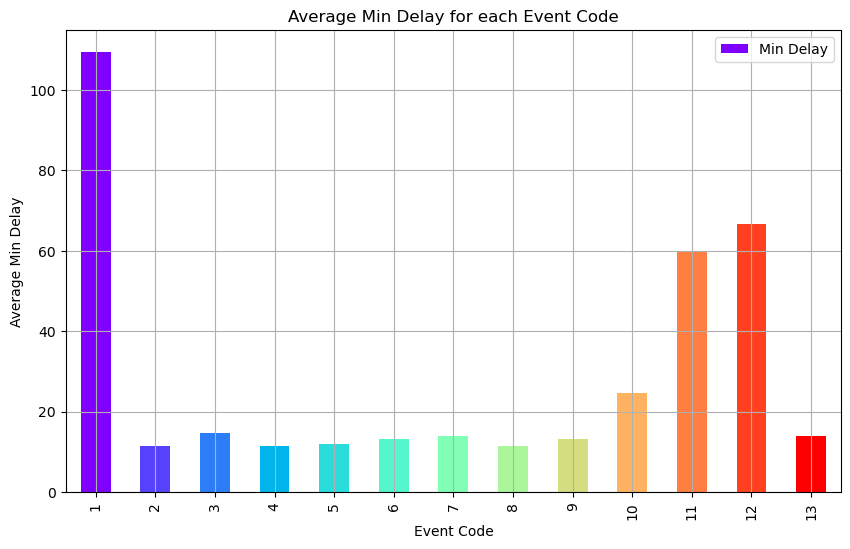

In [131]:
# Matplotlib plot
grouped = df_proc_csv.groupby('Event Code')['Min Delay'].mean()
colors = cm.rainbow(np.linspace(0, 1, len(grouped)))
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color=colors)
plt.xlabel('Event Code')
plt.ylabel('Average Min Delay')
plt.title('Average Min Delay for each Event Code')
plt.grid(True)
plt.legend()
plt.show()

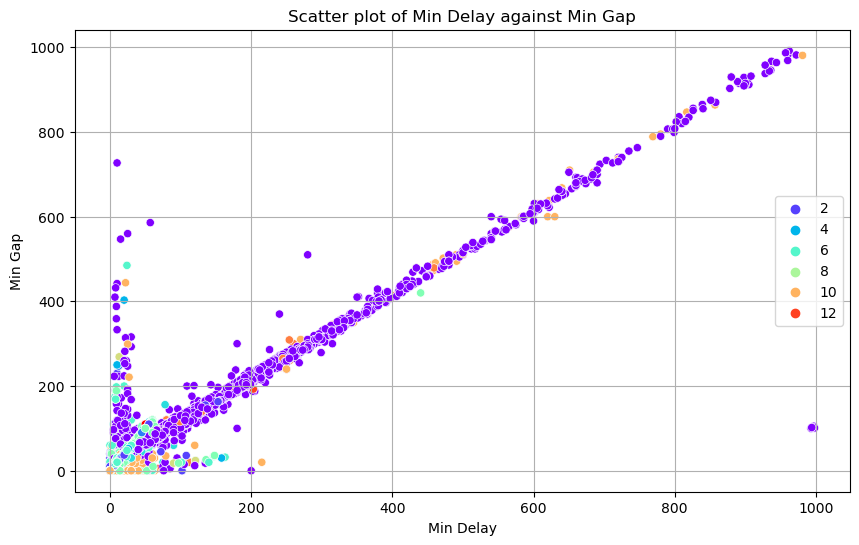

In [132]:
# Seaborn plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Min Delay', y='Min Gap', hue='Event Code', data=df_proc_csv, palette='rainbow')
plt.title('Scatter plot of Min Delay against Min Gap')
plt.grid(True)
plt.legend()
plt.show()

In [133]:
# Save the processed DataFrame as a CSV file
df_proc_csv.to_csv('data/ttc-bus-delay-data-2023-proc.csv')

| Criteria                            | Pass Criteria                                                                                                                                                      | Fail Criteria                                                                                                             |
|-------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| **General Criteria**                |                                                                                                                                                                    |                                                                                                                           |
| Code Execution                      | All code cells execute without errors.                                                                                                                             | Any code cell produces an error upon execution.                                                                           |
| Code Quality                        | Code is well-organized, concise, and includes necessary comments for clarity.                                                                                      | Code is unorganized, verbose, or lacks necessary comments.                                                                 |
| Data Handling                       | Proper handling, analysis, and visualization of the chosen dataset.                                                                                                | Data is not handled, analyzed, or visualized correctly.                                                                   |
| Adherence to Instructions           | Follows all instructions and requirements as per the assignment.                                                                                                   | Misses or incorrectly implements one or more of the assignment requirements.                                              |
| **Specific Criteria**               |                                                                                                                                                                    |                                                                                                                           |
| Metadata Review         | Successfully reviews and documents metadata about the chosen dataset, including the publishing organization, update frequency, data types, and any limitations or restrictions. | Incomplete or incorrect review of the dataset's metadata. |
| Getting Started           | Loads data into a DataFrame. Accurately profiles the DataFrame, including column names, data types, NaN counts, and DataFrame shape. Generates relevant summary statistics for the data. | Errors or inaccuracies in loading, profiling, or summarizing the data. |
| More Data Wrangling, Filtering | Successfully creates a derived column. Appropriately removes one or more columns. Extracts a subset of columns and rows to a new DataFrame. Investigates and describes null values effectively. | Incomplete or incorrect implementation of data wrangling and filtering techniques. |
| Grouping and Aggregating  | Correctly uses `groupby()` to split data into groups. Applies `agg()` function to perform multiple operations on different columns, creating a summary table. | Inaccurate or incomplete use of grouping and aggregation functions. |
| Plot                   | Successfully plots two or more columns using `matplotlib`. Ensures the plot includes labels, a title, a grid, and a legend. | Incomplete or incorrect implementation of data visualization techniques. |
| **Overall Assessment**              | Meets all the general and specific criteria, indicating a strong understanding of the assignment objectives. | Fails to meet one or more of the general or specific criteria, indicating a need for further learning or clarification. |


## References

### Data Sources
- Open Data Toronto. _TTC Bus Delay Data_. https://open.toronto.ca/dataset/ttc-bus-delay-data/
- Open Data Toronto. _Apartment Building Evaluation_. https://open.toronto.ca/dataset/apartment-building-evaluation/
- Open Data Toronto. _Daily Shelter & Overnight Service Occupancy & Capacity_. https://open.toronto.ca/dataset/daily-shelter-overnight-service-occupancy-capacity/